In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib import cm

In [2]:
from plot_config import *
from utils import *

In [3]:
bins = 5
b = slice(None,None,bins)
bb= (b,b)

In [4]:
ds4 = open_domain4()
dsa = open_domain_all()

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [6]:
ro4 = open_roll4()
roa = open_roll_all()
ro30 = open_roll30()

In [7]:
mm = 1/25.4

In [8]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)
ptime = np.linspace(0,3655,3650)/365
salty_time = rtime[salty_idate - np.arange(len(ptime))]
fresh_time = rtime[fresh_idate - np.arange(len(ptime))]

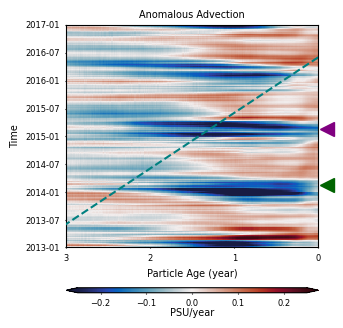

In [73]:
vmax = 0.25

fig = plt.figure(figsize=(90*mm,90*mm))
ax = plt.axes()
ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    # axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
ax.pcolormesh(-ptime[b],rtime[b],ro30['A'][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
ax.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
ax.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
# ax.set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
ax.set_title(term_dic['A'],fontsize = 7,pad = 5)
ax.plot(0.1,np.datetime64('2015-02-15'),markersize=10,marker = '<', color='purple', clip_on=False)
ax.plot(0.1,np.datetime64('2014-02-15'),markersize=10,marker = '<', color='darkgreen', clip_on=False)
    # axs[i].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
ax.set_ylim(np.datetime64('2013-01'),np.datetime64('2017-01'))

ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
ax.set_xlim(-3,0)


(label,vmax,cmap,i,j) = ('PSU/year',vmax0,term_cmap,0,6)
cbar = plt.colorbar(cm.ScalarMappable(norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),cmap = cmap),
                    ax = ax,orientation = 'horizontal',extend = 'both',aspect = 50,pad = 0.13)
cbar.ax.tick_params(axis='x', which='major', pad=3.5)

ax.tick_params(length=1,labelsize=6)
cbar.ax.tick_params(length=1,labelsize=6)
cbar.ax.set_xlabel(label,labelpad = 0,fontsize = 7)
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
ax.set_xlabel('Particle Age (year)',fontsize = 7)
ax.set_ylabel('Time',fontsize = 7)
plt.tight_layout()
plt.savefig('roll30_hovmoller.pdf',dpi = 400)

In [60]:
ticklabs

[Text(-0.4, 0, '−0.3'),
 Text(-0.2, 0, '−0.2'),
 Text(0.0, 0, '−0.1'),
 Text(0.20000000000000007, 0, '0.0'),
 Text(0.4, 0, '0.1'),
 Text(0.19999999999999996, 0, '0.2'),
 Text(0.30000000000000004, 0, '0.3')]

/tmp/ipykernel_2496078/3493783631.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/3493783631.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/3493783631.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/3493783631.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_24960

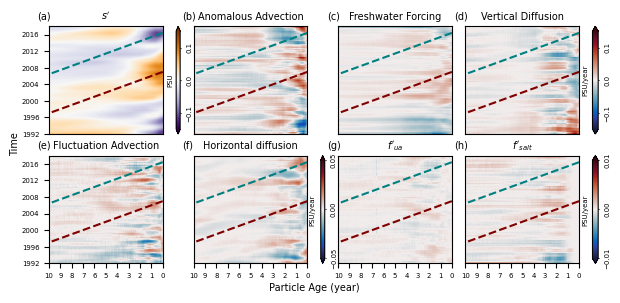

In [10]:
small = 0.035
a = 180*mm
svmax = 0.15
vmax0 = 0.15
vmax1 = 0.05
vmax2 = 0.01

aa = a/(3*small+4+0.5)*2
fig = plt.figure(figsize=(a,aa))
gs = GridSpec(2, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05],wspace = 0.2,hspace = 0.2)
axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(2)])
# fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    axs[i].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
    axs[i].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        # axs[i+8].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    else:
        if i >5:
            vmax = vmax2
        elif i >3:
            vmax = vmax1
        else:
            vmax = vmax0
        cmap = term_cmap
        ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
        ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    # axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    axs[i].pcolormesh(-ptime[b],rtime[b],roa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    # axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    axs[i].set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
    axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    # axs[i].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
for i,ax in enumerate(axs):
    ax.set_xlim(-10,0)
    # ax.set_aspect(aspect)
    if i<4:
        ax.set_xticks([])
    else:
        ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
        ax.tick_params(labelsize=5) 
    if i%4!=0:
        ax.set_yticks([])
    else:
        ax.tick_params(labelsize=5) 

for (label,vmax,cmap,i,j) in [
    ('PSU',svmax,s_cmap,0,1),
    ('PSU/year',vmax0,term_cmap,0,6),
    ('PSU/year',vmax1,term_cmap,1,3),
    ('PSU/year',vmax2,term_cmap,1,6),
]:
    for hey in [0]:
        cbar = plt.colorbar(
            cm.ScalarMappable(
                norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
                cmap = cmap
            ),
            cax = plt.subplot(gs[i+hey,j]),
            extend = 'both',
        )
        cbar.ax.tick_params(axis='y', which='major', pad=3.5)
        if label == 'PSU':
            cbar.ax.set_ylabel(label,labelpad = -18,fontsize = 5)
        else:
            cbar.ax.set_ylabel(label,labelpad = -20,fontsize = 5)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
        cbar.ax.tick_params(length=1)
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
fig.text(0.5, 0.02, 'Particle Age (year)', ha='center',fontsize = 7)
fig.text(0.07, 0.5, 'Time', va='center', rotation='vertical',fontsize = 7)
plt.tight_layout()
plt.savefig('rolled_hovmoller.pdf',dpi = 400)

/tmp/ipykernel_2496078/2772644864.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/2772644864.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/2772644864.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_2496078/2772644864.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_24960

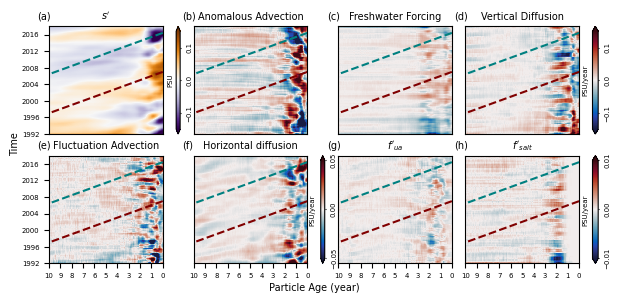

In [11]:
small = 0.035
a = 180*mm
svmax = 0.15
vmax0 = 0.15
vmax1 = 0.05
vmax2 = 0.01

aa = a/(3*small+4+0.5)*2
fig = plt.figure(figsize=(a,aa))
gs = GridSpec(2, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05],wspace = 0.2,hspace = 0.2)
axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(2)])
# fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    axs[i].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
    axs[i].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        # axs[i+8].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    else:
        if i >5:
            vmax = vmax2
        elif i >3:
            vmax = vmax1
        else:
            vmax = vmax0
        cmap = term_cmap
        ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
        ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    # axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    axs[i].pcolormesh(-ptime[b],rtime[b],ro4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    # axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    axs[i].set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
    axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    # axs[i].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
for i,ax in enumerate(axs):
    ax.set_xlim(-10,0)
    # ax.set_aspect(aspect)
    if i<4:
        ax.set_xticks([])
    else:
        ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
        ax.tick_params(labelsize=5) 
    if i%4!=0:
        ax.set_yticks([])
    else:
        ax.tick_params(labelsize=5) 

for (label,vmax,cmap,i,j) in [
    ('PSU',svmax,s_cmap,0,1),
    ('PSU/year',vmax0,term_cmap,0,6),
    ('PSU/year',vmax1,term_cmap,1,3),
    ('PSU/year',vmax2,term_cmap,1,6),
]:
    for hey in [0]:
        cbar = plt.colorbar(
            cm.ScalarMappable(
                norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
                cmap = cmap
            ),
            cax = plt.subplot(gs[i+hey,j]),
            extend = 'both',
        )
        cbar.ax.tick_params(axis='y', which='major', pad=3.5)
        if label == 'PSU':
            cbar.ax.set_ylabel(label,labelpad = -18,fontsize = 5)
        else:
            cbar.ax.set_ylabel(label,labelpad = -20,fontsize = 5)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
        cbar.ax.tick_params(length=1)
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
fig.text(0.5, 0.02, 'Particle Age (year)', ha='center',fontsize = 7)
fig.text(0.07, 0.5, 'Time', va='center', rotation='vertical',fontsize = 7)
plt.tight_layout()
plt.savefig('center_rolled_hovmoller.pdf',dpi = 400)

In [7]:
# small = 0.035
# a = 180*mm
# svmax = 0.15
# vmax0 = 0.75
# vmax1 = 0.2
# vmax2 = 0.1

# aa = a/(3*small+4+0.5)*4
# fig = plt.figure(figsize=(a,aa))
# gs = GridSpec(4, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05],wspace = 0.2,hspace = 0.2)
# axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(4)])
# # fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
# axs = axs.ravel()
# order = ['sf']+ rhs_list
# titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
# for i,var in enumerate(order):
#     if 's' in var:
#         vmax = svmax
#         cmap = s_cmap
#         ratio4 = 1
#         ratioa = 1
#         axs[i].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
#         axs[i].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
#         axs[i+8].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
#         axs[i+8].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
#     else:
#         if i >5:
#             vmax = vmax2
#         elif i >3:
#             vmax = vmax1
#         else:
#             vmax = vmax0
#         cmap = term_cmap
#         ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
#         ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
#     axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
#     axs[i+8].pcolormesh(-ptime[b],rtime[b],dsa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
#     axs[i].set_title(titles[i],fontsize = 7,pad = 5)
#     axs[i].set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
#     axs[i+8].set_title(titles[i],fontsize = 7,pad = 5)
#     axs[i+8].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# # aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
# for i,ax in enumerate(axs):
#     ax.set_xlim(-10,0)
#     # ax.set_aspect(aspect)
#     if i<12:
#         ax.set_xticks([])
#     else:
#         ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
#         ax.tick_params(labelsize=5) 
#     if i%4!=0:
#         ax.set_yticks([])
#     else:
#         ax.tick_params(labelsize=5) 

# for (label,vmax,cmap,i,j) in [
#     ('PSU',svmax,s_cmap,0,1),
#     ('PSU/year',vmax0,term_cmap,0,6),
#     ('PSU/year',vmax1,term_cmap,1,3),
#     ('PSU/year',vmax2,term_cmap,1,6),
# ]:
#     for hey in [0,2]:
#         cbar = plt.colorbar(
#             cm.ScalarMappable(
#                 norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
#                 cmap = cmap
#             ),
#             cax = plt.subplot(gs[i+hey,j]),
#             extend = 'both',
#         )
#         cbar.ax.tick_params(axis='y', which='major', pad=3.5)
#         if label == 'PSU':
#             cbar.ax.set_ylabel(label,labelpad = -18,fontsize = 5)
#         else:
#             cbar.ax.set_ylabel(label,labelpad = -20,fontsize = 5)
#         ticklabs = cbar.ax.get_yticklabels()
#         cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
#         cbar.ax.tick_params(length=1)
# # plt.tight_layout()
# # fig.add_subplot(111, frameon=False)
# # plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# # plt.xlabel('Time')
# # plt.ylabel('Particle Age (year)')
# # fig.supxlabel('Time')
# # fig.supylabel('Particle Age (year)')
# fig.text(0.5, 0.07, 'Particle Age (year)', ha='center',fontsize = 7)
# fig.text(0.07, 0.5, 'Time', va='center', rotation='vertical',fontsize = 7)
# plt.tight_layout()
# plt.savefig('hovmoller.pdf',dpi = 400)

/tmp/ipykernel_1544156/2283487575.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/2283487575.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/2283487575.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/2283487575.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_15441

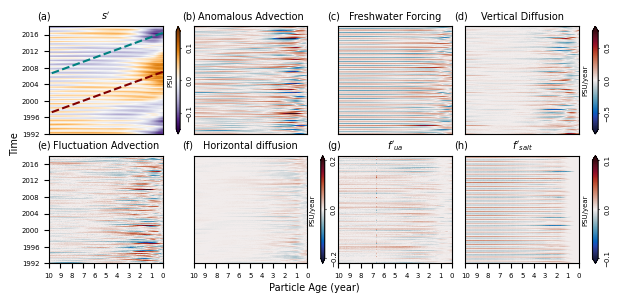

In [15]:
small = 0.035
a = 180*mm
svmax = 0.15
vmax0 = 0.75
vmax1 = 0.2
vmax2 = 0.1

aa = a/(3*small+4+0.5)*2
fig = plt.figure(figsize=(a,aa))
gs = GridSpec(2, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05],wspace = 0.2,hspace = 0.2)
axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(2)])
# fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        axs[i].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        axs[i].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    else:
        if i >5:
            vmax = vmax2
        elif i >3:
            vmax = vmax1
        else:
            vmax = vmax0
        cmap = term_cmap
        ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
        ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    # axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    axs[i].pcolormesh(-ptime[b],rtime[b],dsa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    # axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    axs[i].set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
    axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    # axs[i].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
for i,ax in enumerate(axs):
    ax.set_xlim(-10,0)
    # ax.set_aspect(aspect)
    if i<4:
        ax.set_xticks([])
    else:
        ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
        ax.tick_params(labelsize=5) 
    if i%4!=0:
        ax.set_yticks([])
    else:
        ax.tick_params(labelsize=5) 

for (label,vmax,cmap,i,j) in [
    ('PSU',svmax,s_cmap,0,1),
    ('PSU/year',vmax0,term_cmap,0,6),
    ('PSU/year',vmax1,term_cmap,1,3),
    ('PSU/year',vmax2,term_cmap,1,6),
]:
    for hey in [0]:
        cbar = plt.colorbar(
            cm.ScalarMappable(
                norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
                cmap = cmap
            ),
            cax = plt.subplot(gs[i+hey,j]),
            extend = 'both',
        )
        cbar.ax.tick_params(axis='y', which='major', pad=3.5)
        if label == 'PSU':
            cbar.ax.set_ylabel(label,labelpad = -18,fontsize = 5)
        else:
            cbar.ax.set_ylabel(label,labelpad = -20,fontsize = 5)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
        cbar.ax.tick_params(length=1)
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
fig.text(0.5, 0.02, 'Particle Age (year)', ha='center',fontsize = 7)
fig.text(0.07, 0.5, 'Time', va='center', rotation='vertical',fontsize = 7)
plt.tight_layout()
plt.savefig('hovmoller.pdf',dpi = 400)

/tmp/ipykernel_1544156/4279643477.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/4279643477.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/4279643477.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_1544156/4279643477.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
/tmp/ipykernel_15441

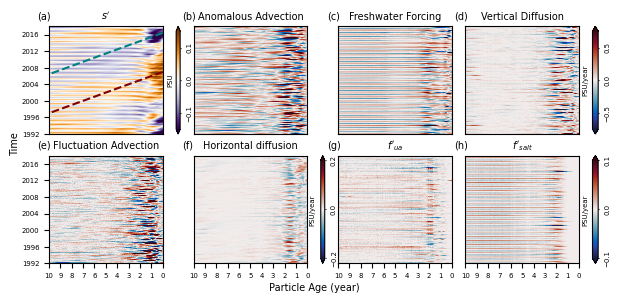

In [16]:
small = 0.035
a = 180*mm
svmax = 0.15
vmax0 = 0.75
vmax1 = 0.2
vmax2 = 0.1

aa = a/(3*small+4+0.5)*2
fig = plt.figure(figsize=(a,aa))
gs = GridSpec(2, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05],wspace = 0.2,hspace = 0.2)
axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(2)])
# fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        axs[i].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        axs[i].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        # axs[i+8].plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    else:
        if i >5:
            vmax = vmax2
        elif i >3:
            vmax = vmax1
        else:
            vmax = vmax0
        cmap = term_cmap
        ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
        ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    # axs[i].pcolormesh(-ptime[b],rtime[b],dsa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap,linewidth = 0,rasterized = True)
    # axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    axs[i].set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)
    axs[i].set_title(titles[i],fontsize = 7,pad = 5)
    # axs[i].set_title(f'({chr(97+i+8)})',loc = 'left',fontsize = 7,x = -0.1,pad = 5)


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
for i,ax in enumerate(axs):
    ax.set_xlim(-10,0)
    # ax.set_aspect(aspect)
    if i<4:
        ax.set_xticks([])
    else:
        ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
        ax.tick_params(labelsize=5) 
    if i%4!=0:
        ax.set_yticks([])
    else:
        ax.tick_params(labelsize=5) 

for (label,vmax,cmap,i,j) in [
    ('PSU',svmax,s_cmap,0,1),
    ('PSU/year',vmax0,term_cmap,0,6),
    ('PSU/year',vmax1,term_cmap,1,3),
    ('PSU/year',vmax2,term_cmap,1,6),
]:
    for hey in [0]:
        cbar = plt.colorbar(
            cm.ScalarMappable(
                norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
                cmap = cmap
            ),
            cax = plt.subplot(gs[i+hey,j]),
            extend = 'both',
        )
        cbar.ax.tick_params(axis='y', which='major', pad=3.5)
        if label == 'PSU':
            cbar.ax.set_ylabel(label,labelpad = -18,fontsize = 5)
        else:
            cbar.ax.set_ylabel(label,labelpad = -20,fontsize = 5)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=5,rotation = 90,va = 'center')
        cbar.ax.tick_params(length=1)
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
fig.text(0.5, 0.02, 'Particle Age (year)', ha='center',fontsize = 7)
fig.text(0.07, 0.5, 'Time', va='center', rotation='vertical',fontsize = 7)
plt.tight_layout()
plt.savefig('center_hovmoller.pdf',dpi = 400)

In [10]:
if regen_talk:
    var = 'sf'
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        plt.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    plt.pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap)
    plt.colorbar(extend = 'both',label = 'PSU')
    plt.xlim(-10,0)
    plt.xticks(-np.arange(11), [str(i) for i in range(11)])
    plt.xlabel('Particle Age (year)')
    plt.ylabel('Time')
    plt.savefig('talkfig8_0.png',dpi = dpi)

In [11]:
if regen_talk:
    var = 'sf'
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        plt.plot(-ptime,salty_time,'--', color = salty_theme_color,zorder = 10)
        plt.plot(-ptime,fresh_time,'--', color = fresh_theme_color,zorder = 10)
    plt.pcolormesh(-ptime[b],rtime[b],dsa[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap)
    plt.colorbar(extend = 'both',label = 'PSU')
    plt.xlim(-10,0)
    plt.xticks(-np.arange(11), [str(i) for i in range(11)])
    plt.xlabel('Particle Age (year)')
    plt.ylabel('Time')
    plt.savefig('talkfig8_1.png',dpi = dpi)